In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
nutrition = pd.read_csv("../input/starbucks-menu/starbucks_drinkMenu_expanded.csv")
nutrition.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


## Task 1 Plot Numerical Variable with a Histogram

> ### Plot a Numerical Variable with a Histogram

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


Text(0.5, 1.0, 'Calories in Starbucks Menu Items')

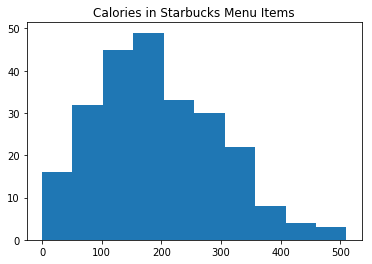

In [22]:
# list all the column names
print(nutrition.columns)
# get the Calories
calories = nutrition['Calories']
# plot a histgram of calories
plt.hist(calories)
plt.title('Calories in Starbucks Menu Items')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


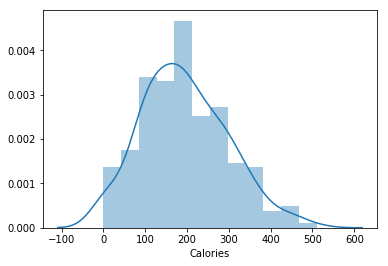

In [23]:
ax = sns.distplot(calories)

> ### Plot a Histogram with extra stuff

Text(0, 0.5, 'Count')

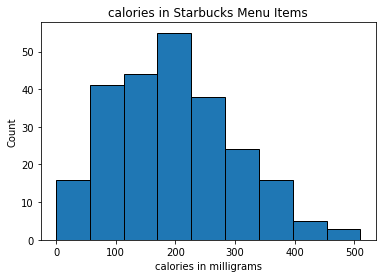

In [24]:
# Plot a histogram of sodium content with nine bins, a black edge 
# around the columns & at a larger size
plt.hist(calories, bins=9, edgecolor = "black")
plt.title("calories in Starbucks Menu Items") # add a title
plt.xlabel("calories in milligrams") # label the x axes 
plt.ylabel("Count") # label the y axes

> ### Plot a histogram using the pandas wrapper of matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cfece5c18>]],
      dtype=object)

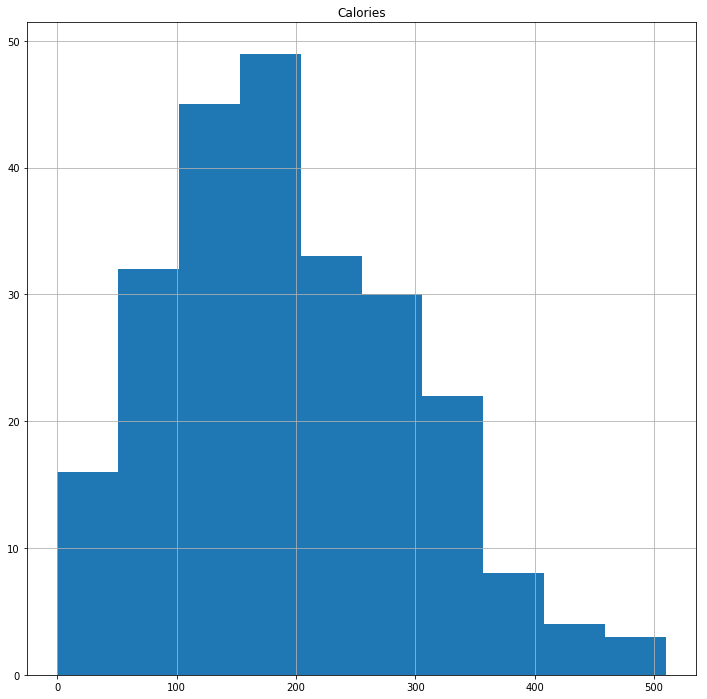

In [25]:
### another way of plotting a histogram (from the pandas plotting API)
# figsize is an argument to make it bigger
nutrition.hist(column= "Calories", figsize = (12,12))

## Task 2: Perform a T-test

- Question: Is a numerica variable different between two groups?
- Answer: t-test
- A t-test is a statistical test that can help us estimate whether the difference in a numerical measure between two groups is reliable. Because we’re comparing two groups to each other, we’re going to be using a special flavor of a t-test called an independent samples t-test. (You can do a t-test with only one sample, but you need to know what you’d expect the mean and standard deviation of the group you sampled it from to be.) If you want to compare more than two groups, you can use an extension of a t-test called an “Analysis of Variance” or “ANOVA”.
- A t-test will return a p-value. If a p-value is very low (generally below 0.01) this is evidence that it’s unlikely that we would have drawn our second sample from the same distribution as the first just by chance.

In [26]:
from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot # for a qqplot
import matplotlib.pyplot as plt # for a qqplot
import pylab 
# read in our data
cereals = pd.read_csv("../input/80-cereals/cereal.csv")
# check out the first few lines
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


#### Make sure that the variable is normally distributed, so let's use a qq-polt to do that.

In [27]:
cereals.groupby('type')['sodium'].mean()

type
C    165.067568
H     26.666667
Name: sodium, dtype: float64

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

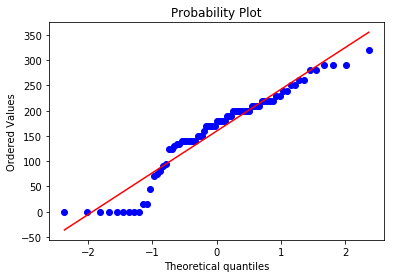

In [28]:
# # plot a qqplot to check normality. If the varaible is normally distributed, most of the points 
# should be along the center diagonal.
probplot(cereals["sodium"], dist="norm", plot=pylab)

### Perform T-test

In [29]:
# get the sodium for hot cerals
hotcereals = cereals['sodium'][cereals['type'] == 'H']
# get the sodium for cold cereals
coldcereals = cereals['sodium'][cereals['type'] == 'C']

# Do the t-test for comparing
ttest_ind(hotcereals, coldcereals, equal_var=False)

Ttest_indResult(statistic=-4.896357618932593, pvalue=0.02411482081945822)

- Statistic is the actual value of the t-test, and the pvalue is the probability that we saw a difference this large between our two groups just due to chance if they were actually drawn from the same underlying population.
- Set the alpha = 0.05, then it would reject the null.


In [30]:
# look at the means (averages) of each group to see which is larger
print("Mean sodium for the hot cereals:")
print(hotcereals.mean())

print("Mean sodium for the cold cereals:")
print(coldcereals.mean())

Mean sodium for the hot cereals:
26.666666666666668
Mean sodium for the cold cereals:
165.06756756756758


#### Plot for the two cereal types, with each as a different color

Text(0.5, 1.0, 'Sodium(mg) content of cereals by type')

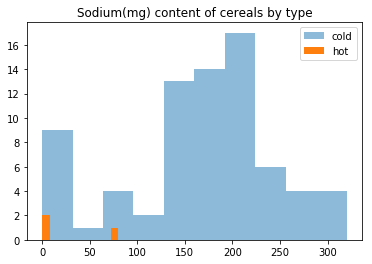

In [31]:
# plot the cold cereals
plt.hist(coldcereals, alpha=0.5, label='cold')
# and the hot cereals
plt.hist(hotcereals, label='hot')
# and add a legend
plt.legend(loc='upper right')
# add a title
plt.title("Sodium(mg) content of cereals by type")

## Task 3: Visualize categorial data with a bar chart

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
# read in our data
dataframe = pd.read_csv("../input/anonymous-survey/anonymous-survey-responses.csv")
# look at the first few rows
dataframe.head()

,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
0,Yep,Nope,I want to get a job where I use data science,Cats ?±
1,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
2,Yep,I have a little bit of experience,It will help me in my current job,Dogs ?¶
3,Nope,I have a little bit of experience,Just curious,Cats ?±
4,"Yes, but I've forgotten everything",I have quite a bit of experience,I want to get a job where I use data science,Neither ?…


Text(0.5, 1.0, 'Pet Preferences')

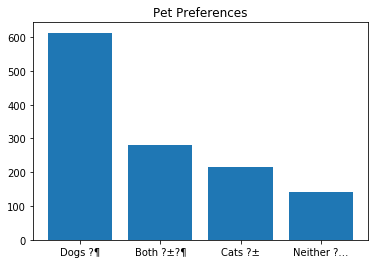

In [33]:
## data preperation

# count how often each pet preference is observed 
petFreqTable = dataframe["Just for fun, do you prefer dogs or cat?"].value_counts()

# get us a list of the names
list(petFreqTable.index)
# get us a list of the counts
petFreqTable.values

# get all the name from our frequency plot & save them for later
labels = list(petFreqTable.index)

# generate a list of numbers as long as our number of labels
positionsForBars = list(range(len(labels)))

## actual plotting

# pass the names and counts to the bar function
plt.bar(positionsForBars, petFreqTable.values) # plot our bars
plt.xticks(positionsForBars, labels) # add lables
plt.title("Pet Preferences")

Text(0.5, 1.0, 'Dogs vs. Cats')

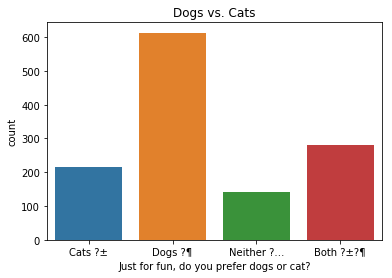

In [34]:
# Use searborn 
import seaborn as sns

# make a barplot from a column in our dataframe
sns.countplot(dataframe["Just for fun, do you prefer dogs or cat?"]).set_title("Dogs vs. Cats")

## Task 4: Using a Chi-Square Test

##### Chi-square test is used to compare categorical variables. There are two type of chi-square test
1. Goodness of fit test, which determines if a sample matches the population.
2. A chi-square fit test for two independent variables is used to compare two variables in a contingency table to check if the data fits.

A small chi-square value means that data fits
b. A high chi-square value means that data doesn’t fit.

##### The hypothesis being tested for chi-square is: 
- Null: Variable A and Variable B are independent
- Alternate: Variable A and Variable B are not independent.

#### Finding out if there's a relationship between having programming background and having taken statistics

In [35]:
import scipy.stats # statistics
import pandas as pd # dataframe

# read in our data
dataframe.head()

,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
0,Yep,Nope,I want to get a job where I use data science,Cats ?±
1,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
2,Yep,I have a little bit of experience,It will help me in my current job,Dogs ?¶
3,Nope,I have a little bit of experience,Just curious,Cats ?±
4,"Yes, but I've forgotten everything",I have quite a bit of experience,I want to get a job where I use data science,Neither ?…


### Do a chi-square test.
- The chisquare function from scipy.stats will only do a one-way comparison, so let's start with that.

In [37]:
# one-way chi-squared test for stats background
scipy.stats.chisquare(dataframe["Have you ever taken a course in statistics?"].value_counts())

Power_divergenceResult(statistic=108.50120096076861, pvalue=2.7495623442639547e-24)

Statistic here is the chi-square value (larger = more difference from a uniform distrobution) and pvalue is the p-value, which is very low here.

In [38]:
# one-way chi-square test for programming background
scipy.stats.chisquare(dataframe["Do you have any previous experience with programming?"].value_counts())

Power_divergenceResult(statistic=906.2001601281024, pvalue=7.55591487886036e-195)

Again, our p-value is very low. This means that we can be sure, for both these questions, that the people who answered them are not drawn from a pool of people who are uniformly likely to have chosen each answer.

#### Do a two-way comparison
- Is there a relationship between having programming background and having taken statistics?

In [39]:
contingencyTable = pd.crosstab(dataframe["Do you have any previous experience with programming?"],
                              dataframe["Have you ever taken a course in statistics?"])

scipy.stats.chi2_contingency(contingencyTable)

(16.827631021435366,
 0.03195483698199162,
 8,
 array([[ 94.48839071, 204.47878303, 162.03282626],
        [  0.40992794,   0.88710969,   0.70296237],
        [ 43.45236189,  94.0336269 ,  74.51401121],
        [108.22097678, 234.19695757, 185.58206565],
        [  9.42834267,  20.40352282,  16.16813451]]))

- Here, the first value (16.827) is the  χ^2 value, the second value (0.032) is the p-value and the third value (8) is the degrees of freedom. - Since our p-value is under our alpha of 0.05, we can say that it seems unlikely that there isn't a connection between these two things, right?
- BUT! Becuase we have preformed three tests of statistical significance we need to correct for the fact that the probability that we're going to get a significant effect just by chance increases with each test. (If you set your alpha to 0.05, you'll be wrong just by chance 1/20 times, so if you preform 20 test you're very likely to get the wrong answer on one of them & you need to correct for that.) We can do by dividing our alpha by x, where x is the number of tests we have preformed. So in this case, our p-value would have to be below a value of 0.016 to have an overall alphs of 0.05.
- Because we did three tests, this final result is not significant at alpha = 0.05.